<font size=+3 color="#3B3534"><center><b>Analysing NBA Data</b></center></font>

###  Introduction

The National Basketball Association (NBA) is one of the major professional sports leagues in the United States and Canada and is considered the best professional basketball league in the world. Exploratory Data Analysis (EDA) using Python is performed with the goal of discovering new information and answering the questions such as top players based on the salary, top teams based on the most represented players, and average salary of players in each team.

**Table of Contents**
1. [Introduction](#Introduction)
2. [Importing Libraries](#Importing-Libraries)
3. [Load Data](#Load-Data)
4. [Data Cleaning](#Data-Cleaning)
5. [Data Transformation](#Data-Transformation)
5. [EDA](#Exploratory-Data-Analysis-(EDA))
6. [Conclusions](#Conclusions) 


### Importing Libraries

In [1]:
#import Python libraries

import pandas as pd                  # importing pandas library for data manipulation
import matplotlib.pyplot as plt      # importing pyplot interface using matplotlib
import seaborn as sns                # importing seaborm library for interactive visualization

import warnings                      # importing warnings to disable runtime warnings
warnings.filterwarnings("ignore")


### Load Data

In [2]:
#Load the nba.csv data into a Pandas DataFrame
df = pd.read_csv('nba.csv', encoding = "unicode_escape")


In [3]:
#number of rows and columns
df.shape


(457, 8)

In [4]:
#the basic information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    int64  
 5   Weight    457 non-null    int64  
 6   College   373 non-null    object 
 7   Salary    446 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 28.7+ KB


In [5]:
#the first five rows
df.head(5)


,Name,Team,Number,Position,Age,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,231,NaN,5000000.0


In [6]:
#descriptive statistics of numerical columns
df.describe()


,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


### Data Cleaning

#### Handling missing values

In [7]:
#checking the number of missing values in each column
pd.isnull(df).sum()


Name         0
Team         0
Number       0
Position     0
Age          0
Weight       0
College     84
Salary      11
dtype: int64

Observation - The columns - 'College' and 'Salary' consists of null values. The null values in 'College' column are replaced with the value 'Others' assuming the college names of some players are not listed in the list. The null values in 'Salary' column are replaced with the mean value of the 'Salary' column.

In [8]:
#replacing the null values in 'College' column with 'Others'
df['College'].fillna('Others', inplace = True)


In [9]:
#verifying if there is any null values in 'College' column
pd.isnull(df['College']).sum()


0

In [10]:
#replacing the null values in 'Salary' column with it's mean value
df['Salary'].fillna(df['Salary'].mean(), inplace = True)


In [11]:
#verifying if there is any null values in 'Salary' column
pd.isnull(df['Salary']).sum()


0

In [12]:
#checking the number of missing values in each column
pd.isnull(df).sum()


Name        0
Team        0
Number      0
Position    0
Age         0
Weight      0
College     0
Salary      0
dtype: int64

Observation - There are no missing values in the dataset

#### Handling duplicate rows

In [13]:
#to get the sum of duplicate elements in the dataset
df.duplicated().sum()


0

Observation - There are no duplicate elements in the dataset

### Data Transformation

In [14]:
#get column names
df.columns


Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Weight', 'College',
       'Salary'],
      dtype='object')

In [15]:
#Create a new column 'BMI' (Body Mass Index) using the formula: BMI = (weight in pounds / (height in inches)^2) * 703.
#Assuming a fixed height value of 70 inches (5 feet 10 inches)

df['BMI'] = (df['Weight'] / (70**2)) * 703


In [16]:
#the first five rows
df.head(5)


,Name,Team,Number,Position,Age,Weight,College,Salary,BMI
0,Avery Bradley,Boston Celtics,0,PG,25,180,Texas,7.730337e+06,25.824490
1,Jae Crowder,Boston Celtics,99,SF,25,235,Marquette,6.796117e+06,33.715306
2,John Holland,Boston Celtics,30,SG,27,205,Boston University,4.842684e+06,29.411224
3,R.J. Hunter,Boston Celtics,28,SG,22,185,Georgia State,1.148640e+06,26.541837
4,Jonas Jerebko,Boston Celtics,8,PF,29,231,Others,5.000000e+06,33.141429


Observation - The new column 'BMI' is added to dataframe

### Exploratory Data Analysis (EDA)

In [17]:
#Display summary statistics of the 'age', 'weight', and 'salary' columns.
df[['Age','Weight','Salary']].describe()


,Age,Weight,Salary
count,457.000000,457.000000,4.570000e+02
mean,26.938731,221.522976,4.842684e+06
std,4.404016,26.368343,5.165781e+06
min,19.000000,161.000000,3.088800e+04
25%,24.000000,200.000000,1.100602e+06
50%,26.000000,220.000000,2.869440e+06
75%,30.000000,240.000000,6.331404e+06
max,40.000000,307.000000,2.500000e+07


In [18]:
#Calculate the average age, weight, and salary of players in each 'position' category.
avg_by_pos = df.groupby('Position')[['Age','Weight','Salary']].mean()

#display
avg_by_pos


,Age,Weight,Salary
Position,,,
C,27.371795,254.205128,5.967052e+06
PF,27.160000,240.430000,4.570889e+06
PG,26.847826,189.478261,5.067606e+06
SF,26.858824,221.776471,4.857220e+06
SG,26.539216,206.686275,4.034356e+06


In [19]:
#get column names
df.columns


Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Weight', 'College',
       'Salary', 'BMI'],
      dtype='object')

#### Data Visualization

#### 1. Age of Players



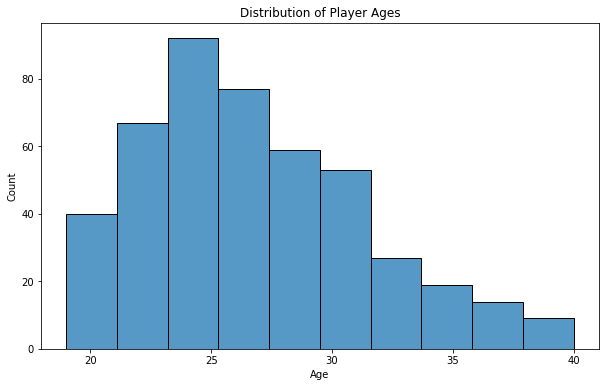

In [20]:
#setting the size
plt.figure(figsize = (10,6))

#creating histogram
sns.histplot(df['Age'], bins = 10)

#setting the title
plt.title('Distribution of Player Ages')

#display
plt.show()


Obervation - Most of the players are in the age group 24-26

#### 2. Salaries of Players for each Position

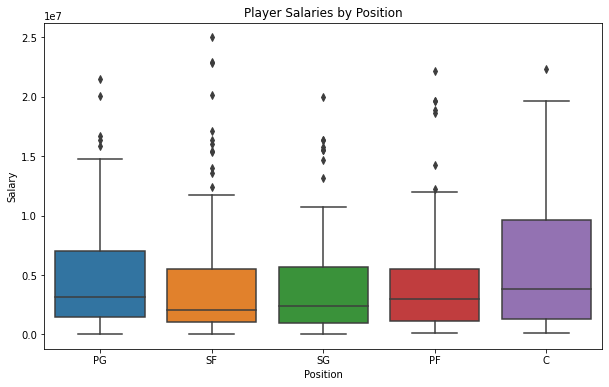

In [21]:
#setting the size
plt.figure(figsize = (10,6))

#creating histogram
sns.boxplot(data = df, x= 'Position', y= 'Salary')

#setting the title
plt.title('Player Salaries by Position')

#display
plt.show()


Observation - The highest salary is for the position 'C'. The minimum and average salaries of all the positions are almost same

#### 3. Age vs. Salary with a different color for each Position

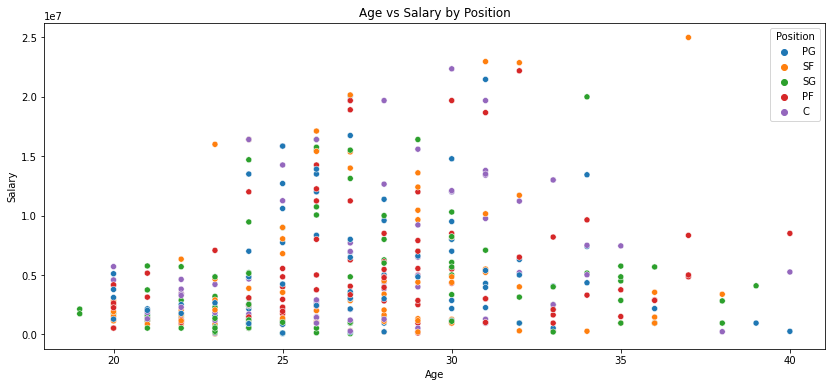

In [22]:
#setting the size
plt.figure(figsize = (14,6))

#creating histogram
sns.scatterplot(data = df, x= 'Age', y= 'Salary', hue = 'Position')

#setting the title
plt.title('Age vs Salary by Position')

#display
plt.show()


Observation - The salary of players are increasing with Age and reaches maximum during the Age group 30-31 and then their salaries are decreasing. 

#### 4.Top Players based on Salary

In [23]:
#create a new dataframe with top 10 players based on salary
top_players = df.sort_values(by = 'Salary', ascending = False).head(10)

top_players


,Name,Team,Number,Position,Age,Weight,College,Salary,BMI
109,Kobe Bryant,Los Angeles Lakers,24,SF,37,212,Others,25000000.0,30.415510
169,LeBron James,Cleveland Cavaliers,23,SF,31,250,Others,22970500.0,35.867347
33,Carmelo Anthony,New York Knicks,7,SF,32,240,Syracuse,22875000.0,34.432653
251,Dwight Howard,Houston Rockets,12,C,30,265,Others,22359364.0,38.019388
339,Chris Bosh,Miami Heat,1,PF,32,235,Georgia Tech,22192730.0,33.715306
100,Chris Paul,Los Angeles Clippers,3,PG,31,175,Wake Forest,21468695.0,25.107143
414,Kevin Durant,Oklahoma City Thunder,35,SF,27,240,Texas,20158622.0,34.432653
164,Derrick Rose,Chicago Bulls,1,PG,27,190,Memphis,20093064.0,27.259184
349,Dwyane Wade,Miami Heat,3,SG,34,220,Marquette,20000000.0,31.563265
98,DeAndre Jordan,Los Angeles Clippers,6,C,27,265,Texas A&M,19689000.0,38.019388


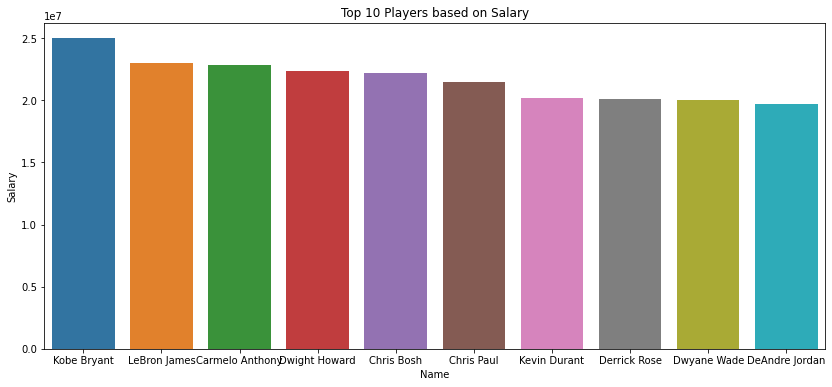

In [24]:
#setting the size
plt.figure(figsize = (14,6))

#creating histogram
sns.barplot(data = top_players, x= 'Name', y= 'Salary')

#setting the title
plt.title('Top 10 Players based on Salary')

#display
plt.show()


Observation - The payer 'Kobe Bryant' is getting the highest salary

#### 5.Top Players based on BMI

In [25]:
#create a new dataframe with top 10 players based on salary
top_players = df.sort_values(by = 'BMI', ascending = False).head(10)

top_players


,Name,Team,Number,Position,Age,Weight,College,Salary,BMI
405,Nikola Pekovic,Minnesota Timberwolves,14,C,30,307,Others,12100000.0,44.045102
302,Boban Marjanovic,San Antonio Spurs,40,C,27,290,Others,1200000.0,41.606122
330,Al Jefferson,Charlotte Hornets,25,C,31,289,Others,13500000.0,41.462653
395,Jusuf Nurkic,Denver Nuggets,23,C,21,280,Others,1842000.0,40.171429
188,Andre Drummond,Detroit Pistons,0,C,22,279,Connecticut,3272091.0,40.027959
41,Kevin Seraphin,New York Knicks,1,C,26,278,Others,2814000.0,39.884490
56,Jahlil Okafor,Philadelphia 76ers,8,C,20,275,Duke,4582680.0,39.454082
237,Zaza Pachulia,Dallas Mavericks,27,C,32,275,Others,5200000.0,39.454082
176,Timofey Mozgov,Cleveland Cavaliers,20,C,29,275,Others,4950000.0,39.454082
155,Cristiano Felicio,Chicago Bulls,6,PF,23,275,Others,525093.0,39.454082


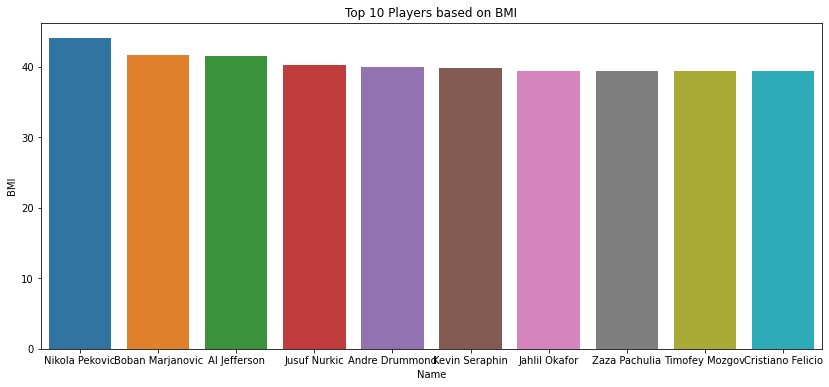

In [26]:
#setting the size
plt.figure(figsize = (14,6))

#creating histogram
sns.barplot(data = top_players, x= 'Name', y= 'BMI')

#setting the title
plt.title('Top 10 Players based on BMI')

#display
plt.show()


Observation - The payer 'Nikola Pekovic' has the highest BMI

#### 6. College Analysis

In [27]:
#create a new dataframe with top colleges based on the most represented players
colleges = df['College'].value_counts()
colleges


Others             84
Kentucky           22
Duke               20
Kansas             18
North Carolina     16
                   ..
Utah Valley         1
Cleveland State     1
Iowa State          1
Florida State       1
Baylor              1
Name: College, Length: 119, dtype: int64

Observation - The value 'Others' to be dropped as it is an irrelevant data

In [28]:
#remove the value 'Others'
colleges.drop('Others', inplace = True)
colleges


Kentucky           22
Duke               20
Kansas             18
North Carolina     16
UCLA               15
                   ..
Utah Valley         1
Cleveland State     1
Iowa State          1
Florida State       1
Baylor              1
Name: College, Length: 118, dtype: int64

In [29]:
#get the top 5 colleges
top_colleges = colleges.head(5)
top_colleges


Kentucky          22
Duke              20
Kansas            18
North Carolina    16
UCLA              15
Name: College, dtype: int64

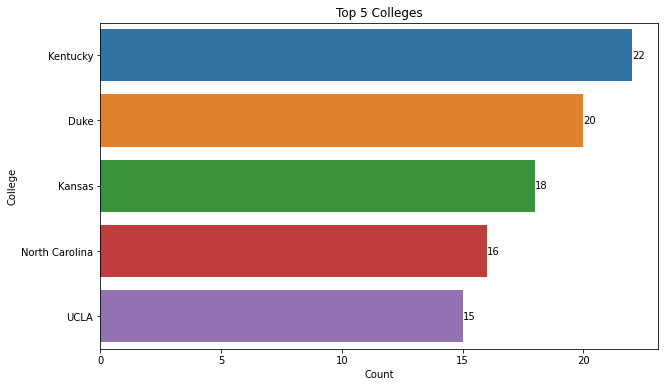

In [30]:
#setting the size
plt.figure(figsize = (10,6))

#creating barplot
ax = sns.barplot(top_colleges,top_colleges.index)

#display the count in each bar
for bars in ax.containers:
    ax.bar_label(bars)

#setting x and y labels
plt.xlabel("Count")
plt.ylabel("College")

#setting the title
plt.title('Top 5 Colleges')

#display
plt.show()


Observation - The college 'Kentuky'  represents the most number of players (22)

#### 7. Position Distribution


In [31]:
#find the distribution of players across different 'positions'.
player_pos_count = df['Position'].value_counts()
player_pos_count


SG    102
PF    100
PG     92
SF     85
C      78
Name: Position, dtype: int64

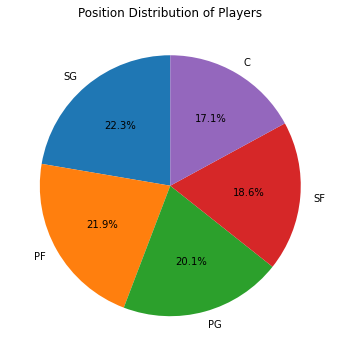

In [32]:
#setting the size
plt.figure(figsize = (10,6))

#creating piechart
plt.pie(player_pos_count, labels = player_pos_count.index, autopct='%1.1f%%', startangle=90)

#setting the title
plt.title('Position Distribution of Players')

#display
plt.show()


Observation - Most of the players are in the position 'SG' 

#### 8. Team Analysis

In [33]:
#Teams
df['Team'].unique()


array(['Boston Celtics', 'Brooklyn Nets', 'New York Knicks',
       'Philadelphia 76ers', 'Toronto Raptors', 'Golden State Warriors',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Phoenix Suns',
       'Sacramento Kings', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Detroit Pistons', 'Indiana Pacers', 'Milwaukee Bucks',
       'Dallas Mavericks', 'Houston Rockets', 'Memphis Grizzlies',
       'New Orleans Pelicans', 'San Antonio Spurs', 'Atlanta Hawks',
       'Charlotte Hornets', 'Miami Heat', 'Orlando Magic',
       'Washington Wizards', 'Denver Nuggets', 'Minnesota Timberwolves',
       'Oklahoma City Thunder', 'Portland Trail Blazers', 'Utah Jazz'],
      dtype=object)

In [34]:
#average salary of players in each team
avg_sal = df.groupby("Team")['Salary'].mean().sort_values(ascending = False)
avg_sal


Team
Cleveland Cavaliers       7.455425e+06
Los Angeles Clippers      6.323643e+06
Oklahoma City Thunder     6.251020e+06
Miami Heat                6.146736e+06
Golden State Warriors     5.924600e+06
Chicago Bulls             5.785559e+06
San Antonio Spurs         5.629516e+06
Memphis Grizzlies         5.328979e+06
Charlotte Hornets         5.222728e+06
Washington Wizards        5.088576e+06
Houston Rockets           5.018868e+06
Atlanta Hawks             4.860197e+06
Los Angeles Lakers        4.784695e+06
Sacramento Kings          4.778911e+06
Dallas Mavericks          4.746582e+06
Toronto Raptors           4.741174e+06
Minnesota Timberwolves    4.610884e+06
New York Knicks           4.581494e+06
Detroit Pistons           4.477884e+06
Indiana Pacers            4.450122e+06
New Orleans Pelicans      4.355304e+06
Milwaukee Bucks           4.350220e+06
Denver Nuggets            4.330974e+06
Orlando Magic             4.297248e+06
Phoenix Suns              4.229676e+06
Boston Celtics      

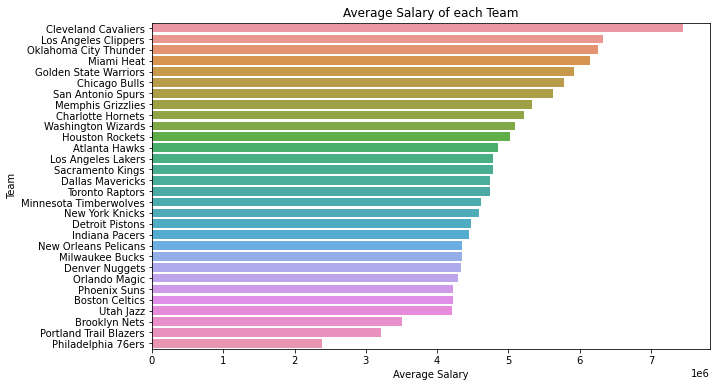

In [35]:
#setting the size
plt.figure(figsize = (10,6))

#creating barplot
ax = sns.barplot(avg_sal,avg_sal.index)

#setting x and y labels
plt.xlabel("Average Salary")
plt.ylabel("Team")

#setting the title
plt.title('Average Salary of each Team')

#display
plt.show()

Observation - Considering the average salary of players, the team - 'Cleveland Cavaliers' is in the top position and the team 'Philadelphia 76ers' is in the last position.

### Conclusions 

- Most of the players are in the age group 24-26 and in the position 'SG'
- The payer 'Kobe Bryant' is getting the highest salary and the payer 'Nikola Pekovic' has the highest BMI
- The minimum and average salaries of all the positions are almost same. The salary of players are increasing with Age and         reaches maximum during the Age group 30-31 and then their salaries are decreasing
- The highest salary is for the position 'C'
- Considering the average salary of players, the team - 'Cleveland Cavaliers' is in the top position and the team                 'Philadelphia76ers' is in the last position
- The college 'Kentuky' represents the most number of players (22)
